In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("../Data/preprocessed/stance_preprocessed.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Headline                     49972 non-null  object 
 1   Body ID                      49972 non-null  int64  
 2   Stance                       49972 non-null  object 
 3   articleBody                  49972 non-null  object 
 4   headline_len_chars           49972 non-null  int64  
 5   headline_len_words           49972 non-null  int64  
 6   body_len_chars               49972 non-null  int64  
 7   body_len_words               49972 non-null  int64  
 8   headline_body_overlap_ratio  49972 non-null  float64
 9   cosine_sim                   49972 non-null  float64
 10  headline_sentiment           49972 non-null  float64
 11  body_sentiment               49972 non-null  float64
 12  readability                  49972 non-null  float64
 13  headline_prep   

In [4]:
df.head()

,Headline,Body ID,Stance,articleBody,headline_len_chars,headline_len_words,body_len_chars,body_len_words,headline_body_overlap_ratio,cosine_sim,headline_sentiment,body_sentiment,readability,headline_prep,body_prep,entity_count,combined_text,stance_label
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...,115,19,1093,195,0.111111,0.000000,-0.100000,0.125000,61.018112,police find mass graf least body near mexico t...,danny boyle directing untitled film seth rogen...,13,police find mass graf least body near mexico t...,3
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...,65,11,2584,429,0.909091,0.578256,0.000000,0.065038,42.718733,hundred palestinian flee flood gaza israel ope...,hundred palestinian evacuated home sunday morn...,48,hundred palestinian flee flood gaza israel ope...,0
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...,91,16,1111,194,0.250000,0.000000,0.142857,-0.052121,53.778581,christian bale pass role steve job actor repor...,year old moscow resident hospitalized wound in...,4,christian bale pass role steve job actor repor...,3
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...,82,14,500,80,0.166667,0.000000,0.000000,0.111111,37.935585,hbo apple talk month apple tv streaming servic...,reuters canadian soldier shot canadian war mem...,10,hbo apple talk month apple tv streaming servic...,3
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's...",63,10,3386,612,0.700000,0.210278,0.000000,0.105658,68.825622,spider burrowed tourist stomach chest,fear arachnophobes story bunbury spiderman mig...,12,spider burrowed tourist stomach chest fear ara...,1


In [5]:
df["body_prep"].isna().sum()

np.int64(0)

In [6]:
df["headline_prep"].isna().sum()

np.int64(0)

In [7]:
df["combined"] = df["headline_prep"].astype(str) + " [SEP] " + df["body_prep"].astype(str)
X = df["combined"].values

In [8]:
le = LabelEncoder()
y = le.fit_transform(df["Stance"])

In [9]:
X.shape

(49972,)

In [10]:
y.shape

(49972,)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
def evaluate_model(model_name, y_true, y_pred):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1": f1_score(y_true, y_pred, average='weighted')
    }

In [13]:
results = []

# TF-IDF

In [14]:
tfidf = TfidfVectorizer(
    max_features=15000,
    ngram_range=(1, 1),
    sublinear_tf=True
)

In [15]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5958784 stored elements and shape (39977, 15000)>

In [16]:
X_val_tfidf = tfidf.transform(X_val)
X_val_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1490967 stored elements and shape (9995, 15000)>

# Logistic Regression

In [17]:
model_lr = LogisticRegression()

In [18]:
model_lr.fit(X_train_tfidf, y_train)

C:\Users\Owner\PycharmProjects\TrustNet\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
y_pred = model_lr.predict(X_val_tfidf)

In [20]:
metrics_lr = evaluate_model("Logistic Regression", y_val, y_pred)
metrics_lr

{'Model': 'Logistic Regression',
 'Accuracy': 0.8277138569284642,
 'Precision': 0.818596580800666,
 'Recall': 0.8277138569284642,
 'F1': 0.7999429998909251}

In [21]:
results.append(metrics_lr)

# Ridge Regression

In [22]:
model_rr = RidgeClassifier()

In [23]:
model_rr.fit(X_train_tfidf, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,class_weight,None
,solver,'auto'
,positive,False
,random_state,None


In [24]:
y_pred_rr = model_rr.predict(X_val_tfidf)

In [25]:
metrics_rr = evaluate_model("Ridge Classifier", y_val, y_pred_rr)
metrics_rr

{'Model': 'Ridge Classifier',
 'Accuracy': 0.8404202101050525,
 'Precision': 0.8282550462685316,
 'Recall': 0.8404202101050525,
 'F1': 0.8185192614878772}

In [26]:
results.append(metrics_rr)

# Random Forest Classifier

In [27]:
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [28]:
model_rf.fit(X_train_tfidf, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
y_pred_rf = model_rf.predict(X_val_tfidf)

In [30]:
metrics_rf = evaluate_model("Random Forest Classifier", y_val, y_pred_rf)
metrics_rf

{'Model': 'Random Forest Classifier',
 'Accuracy': 0.8675337668834417,
 'Precision': 0.8575592369321854,
 'Recall': 0.8675337668834417,
 'F1': 0.8602862775468828}

In [31]:
results.append(metrics_rf)

# Gradient Boosting

In [32]:
model_gbc = GradientBoostingClassifier(random_state=42)

In [33]:
model_gbc.fit(X_train_tfidf, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [34]:
y_pred_gbc = model_gbc.predict(X_val_tfidf)

In [35]:
metrics_gbc = evaluate_model("Gradient Boosting Classifier", y_val, y_pred_gbc)
metrics_gbc

{'Model': 'Gradient Boosting Classifier',
 'Accuracy': 0.8036018009004502,
 'Precision': 0.8133548418714289,
 'Recall': 0.8036018009004502,
 'F1': 0.7600806652778875}

In [36]:
results.append(metrics_gbc)

# XGBoost

In [37]:
model_xgb = XGBClassifier(random_state=42, eval_metric="logloss", n_estimators=200, tree_method="hist")

In [38]:
model_xgb.fit(X_train_tfidf, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [39]:
y_pred_xgb = model_xgb.predict(X_val_tfidf)

In [40]:
metrics_xgb = evaluate_model("XGBoost Classifier", y_val, y_pred_xgb)
metrics_xgb

{'Model': 'XGBoost Classifier',
 'Accuracy': 0.9264632316158079,
 'Precision': 0.9220958526655872,
 'Recall': 0.9264632316158079,
 'F1': 0.9229878760919671}

In [41]:
results.append((metrics_xgb))

# Visualize the results

In [42]:
df_results = pd.DataFrame(results)

In [43]:
df_results

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.827714,0.818597,0.827714,0.799943
1,Ridge Classifier,0.840420,0.828255,0.840420,0.818519
2,Random Forest Classifier,0.867534,0.857559,0.867534,0.860286
3,Gradient Boosting Classifier,0.803602,0.813355,0.803602,0.760081
4,XGBoost Classifier,0.926463,0.922096,0.926463,0.922988


In [44]:
df_melt = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

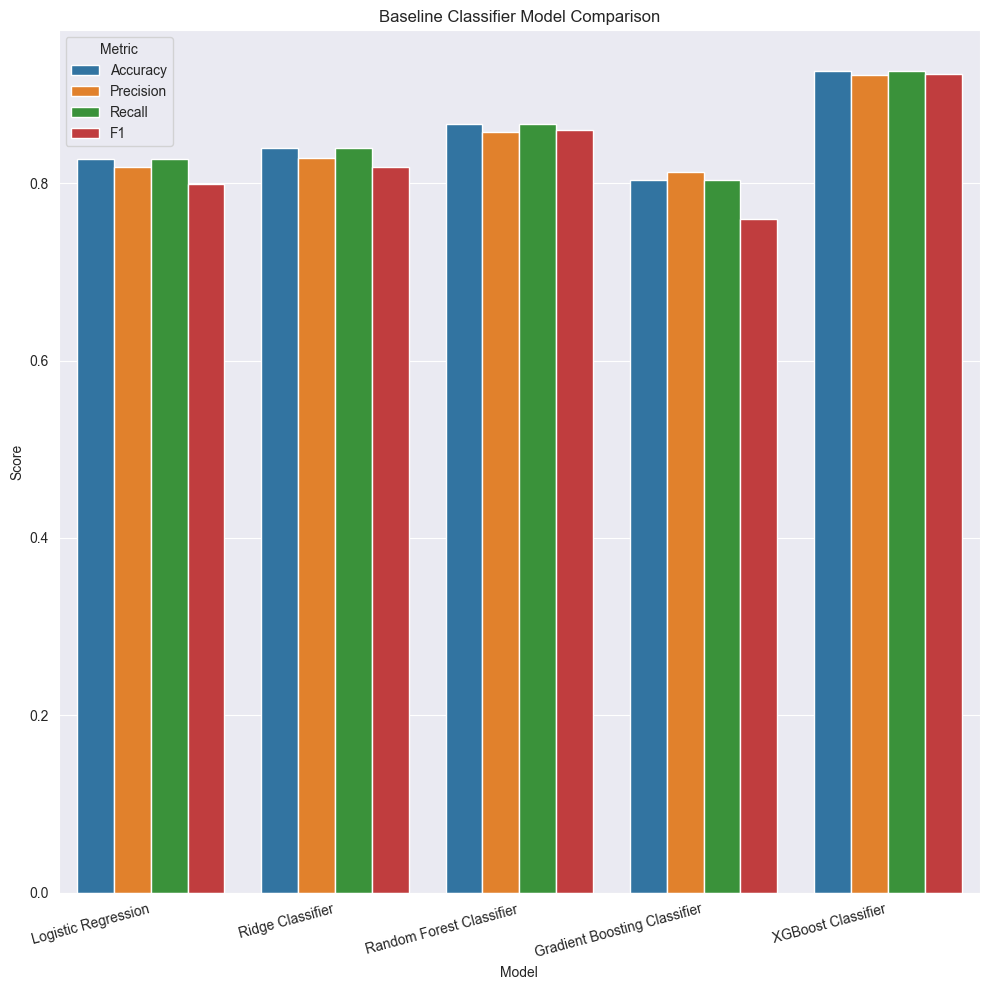

In [58]:
plt.figure(figsize = (10,10))
sns.barplot(data=df_melt, x="Model", y="Score", hue="Metric")
plt.title("Baseline Classifier Model Comparison")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("../images/classicModelsSD.png")
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

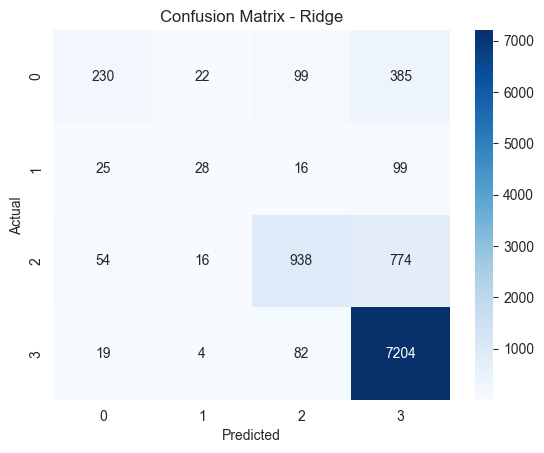


Ridge:
               precision    recall  f1-score   support

           0       0.70      0.31      0.43       736
           1       0.40      0.17      0.24       168
           2       0.83      0.53      0.64      1782
           3       0.85      0.99      0.91      7309

    accuracy                           0.84      9995
   macro avg       0.69      0.50      0.56      9995
weighted avg       0.83      0.84      0.82      9995



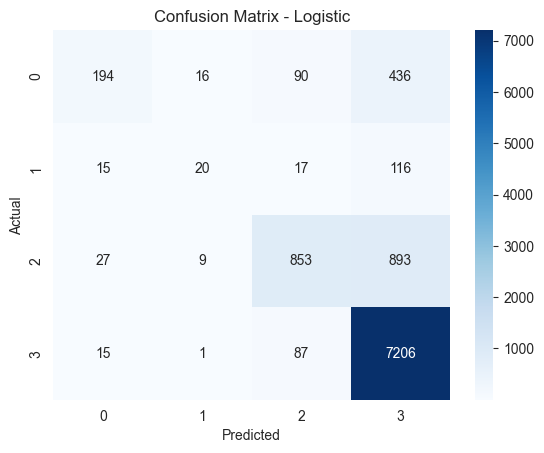


Logistic:
               precision    recall  f1-score   support

           0       0.77      0.26      0.39       736
           1       0.43      0.12      0.19       168
           2       0.81      0.48      0.60      1782
           3       0.83      0.99      0.90      7309

    accuracy                           0.83      9995
   macro avg       0.71      0.46      0.52      9995
weighted avg       0.82      0.83      0.80      9995



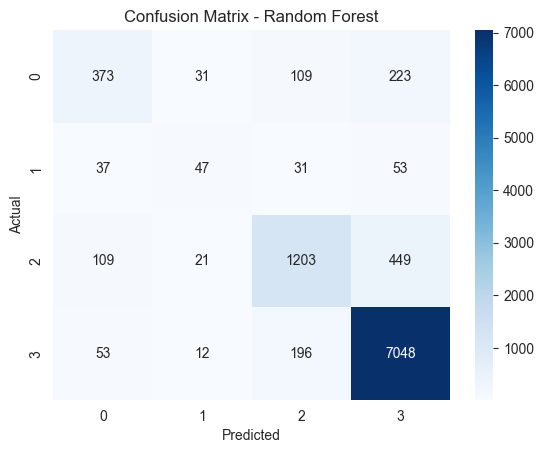


Random Forest:
               precision    recall  f1-score   support

           0       0.65      0.51      0.57       736
           1       0.42      0.28      0.34       168
           2       0.78      0.68      0.72      1782
           3       0.91      0.96      0.93      7309

    accuracy                           0.87      9995
   macro avg       0.69      0.61      0.64      9995
weighted avg       0.86      0.87      0.86      9995



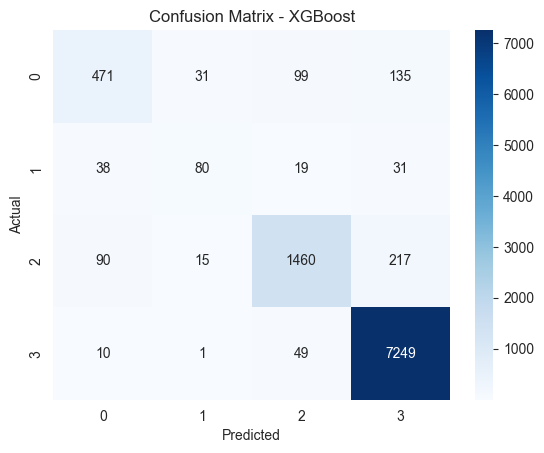


XGBoost:
               precision    recall  f1-score   support

           0       0.77      0.64      0.70       736
           1       0.63      0.48      0.54       168
           2       0.90      0.82      0.86      1782
           3       0.95      0.99      0.97      7309

    accuracy                           0.93      9995
   macro avg       0.81      0.73      0.77      9995
weighted avg       0.92      0.93      0.92      9995



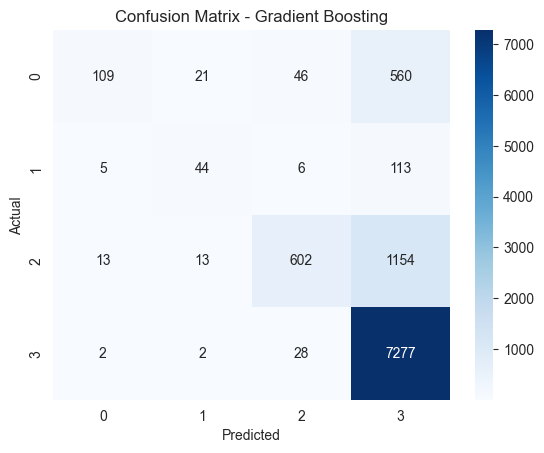


Gradient Boosting:
               precision    recall  f1-score   support

           0       0.84      0.15      0.25       736
           1       0.55      0.26      0.35       168
           2       0.88      0.34      0.49      1782
           3       0.80      1.00      0.89      7309

    accuracy                           0.80      9995
   macro avg       0.77      0.44      0.50      9995
weighted avg       0.81      0.80      0.76      9995



In [47]:
for name, model in [("Ridge", model_rr), ("Logistic", model_lr), ("Random Forest", model_rf), ("XGBoost", model_xgb), ("Gradient Boosting", model_gbc) ]:
    y_pred = model.predict(X_val_tfidf)

    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\n{name}:\n", classification_report(y_val, y_pred))

In [48]:
df["Stance"].value_counts(normalize=True)

Stance
unrelated    0.731310
discuss      0.178280
agree        0.073601
disagree     0.016809
Name: proportion, dtype: float64

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cv_scores = cross_val_score(model_rr, X_train_tfidf, y_train, cv=10, scoring="accuracy")

In [51]:
print(cv_scores, cv_scores.mean())

[0.83616808 0.84867434 0.83816908 0.83566783 0.83466733 0.84392196
 0.84417209 0.84363272 0.8461346  0.83587691] 0.8407084953535062


In [52]:
from sklearn.model_selection import cross_validate

In [53]:
scoring = {
    "f1_macro": "f1_macro",
    "f1_weighted": "f1_weighted"
}

In [54]:
scores = cross_validate(model_rr, X_train_tfidf, y_train, cv=5, scoring=scoring)

In [55]:
print(scores)
print(cv_scores, cv_scores.mean())

{'fit_time': array([2.52038169, 2.51325488, 2.49048924, 2.48618937, 2.4750104 ]), 'score_time': array([0.        , 0.01219034, 0.00406766, 0.00824046, 0.        ]), 'test_f1_macro': array([0.55628752, 0.53503293, 0.56277453, 0.58123985, 0.55684514]), 'test_f1_weighted': array([0.81816991, 0.80900136, 0.81509257, 0.81825143, 0.81726245])}
[0.83616808 0.84867434 0.83816908 0.83566783 0.83466733 0.84392196
 0.84417209 0.84363272 0.8461346  0.83587691] 0.8407084953535062


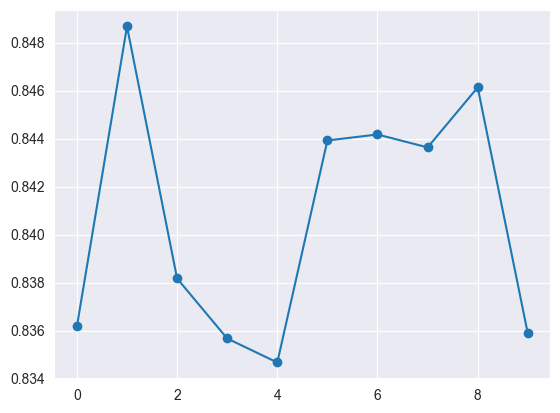

In [56]:
plt.plot(cv_scores, marker="o")

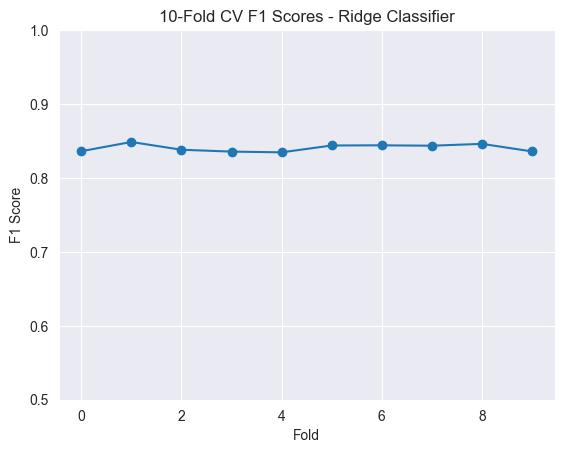

In [57]:
plt.plot(cv_scores, marker='o')
plt.title("10-Fold CV F1 Scores - Ridge Classifier")
plt.ylabel("F1 Score")
plt.xlabel("Fold")
plt.ylim(0.5, 1.0)
plt.grid(True)
plt.show()